In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn

In [ ]:
rawinput = pd.read_csv('movies_metadata.csv')

<ipython-input-2-c74777920222>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  rawinput = pd.read_csv('movies_metadata.csv')


In [ ]:
rawinput.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
rawinput=rawinput[['genres','overview']]

In [ ]:
rawinput

,genres,overview
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom..."
4,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...
...,...,...
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Rising and falling between a man and woman.
45462,"[{'id': 18, 'name': 'Drama'}]",An artist struggles to finish his work while a...
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","When one of her hits goes wrong, a professiona..."
45464,[],"In a small town live two brothers, one a minis..."


In [ ]:
#we wish to remove all the rows where genres is empty list


In [ ]:
rawinput['genres'].apply(lambda x: len(x))

0        96
1        97
2        64
3        93
4        30
         ..
45461    62
45462    29
45463    91
45464     2
45465     2
Name: genres, Length: 45466, dtype: int64

In [ ]:
# above is in string format, so let's convert in list format
rawinput['genres'] = rawinput['genres'].apply(lambda x: eval(x) if x else [])


In [ ]:
rawinput['genres'].apply(lambda x: len(x))

0        3
1        3
2        2
3        3
4        1
        ..
45461    2
45462    1
45463    3
45464    0
45465    0
Name: genres, Length: 45466, dtype: int64

In [ ]:
#now saftely remove any row where number of elements are 0
rawinput=rawinput[rawinput['genres'].apply(lambda x: len(x)>0)]

In [ ]:
rawinput

,genres,overview
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom..."
4,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...
...,...,...
45459,"[{'id': 878, 'name': 'Science Fiction'}]",It's the year 3000 AD. The world's most danger...
45460,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","Yet another version of the classic epic, with ..."
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Rising and falling between a man and woman.
45462,"[{'id': 18, 'name': 'Drama'}]",An artist struggles to finish his work while a...


<Axes: >

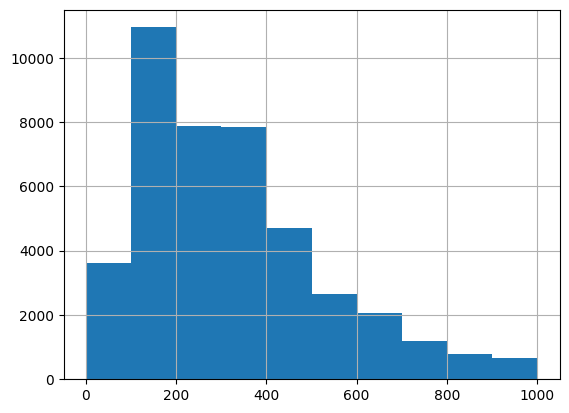

In [ ]:
rawinput['overview'].str.len().hist()

In [ ]:
rawinput['overview'].str.len().describe()

count    42327.000000
mean       323.410943
std        203.558527
min          1.000000
25%        160.000000
50%        283.000000
75%        428.000000
max       1000.000000
Name: overview, dtype: float64

In [ ]:
rawinput.loc[rawinput['overview'].str.len()<30, 'overview'].sort_values(key=lambda x: x.str.len(), ascending=True)


28408                                 
36785                                x
4246                                  
4538                                  
13346                              ...
                     ...              
43651     The last film of Jean Gabin.
18562     Out of Darkness, Comes Light
42428    Sci-fi end of the world drama
15461    Discovery Channel documentary
22261    Documentary about horror fans
Name: overview, Length: 189, dtype: object

In [ ]:
# It might be difficult to predict genere based on less then 30 chars so let's remove all these 886 rows
rawinput=rawinput[rawinput['overview'].str.len()>30]


In [ ]:
rawinput

,genres,overview
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom..."
4,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...
...,...,...
45459,"[{'id': 878, 'name': 'Science Fiction'}]",It's the year 3000 AD. The world's most danger...
45460,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","Yet another version of the classic epic, with ..."
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Rising and falling between a man and woman.
45462,"[{'id': 18, 'name': 'Drama'}]",An artist struggles to finish his work while a...


In [ ]:
#let's check maximum number of genres
rawinput['genres'].apply(lambda x: len(x)).describe()

count    42136.000000
mean         2.129248
std          1.055864
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: genres, dtype: float64

In [ ]:
rawinput['genres'].apply(lambda x: len(x)).describe(percentiles=[.75,0.8,.85,0.9,0.95,0.99])

count    42136.000000
mean         2.129248
std          1.055864
min          1.000000
50%          2.000000
75%          3.000000
80%          3.000000
85%          3.000000
90%          4.000000
95%          4.000000
99%          5.000000
max          8.000000
Name: genres, dtype: float64

In [ ]:
# more then 95% movies have maximum 4 genres
#so for simplicity let's remove the rows with more then 4 genres
rawinput=rawinput[rawinput['genres'].apply(lambda x: len(x)<=4)]

In [ ]:
rawinput

,genres,overview
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom..."
4,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...
...,...,...
45459,"[{'id': 878, 'name': 'Science Fiction'}]",It's the year 3000 AD. The world's most danger...
45460,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","Yet another version of the classic epic, with ..."
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Rising and falling between a man and woman.
45462,"[{'id': 18, 'name': 'Drama'}]",An artist struggles to finish his work while a...


In [ ]:
rawinput['genres_list'] = rawinput['genres'].apply(lambda x: ','.join(sorted([genre['name'] for genre in x])))

<ipython-input-21-7875f17473cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawinput['genres_list'] = rawinput['genres'].apply(lambda x: ','.join(sorted([genre['name'] for genre in x])))


In [ ]:
rawinput

,genres,overview,genres_list
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...","Animation,Comedy,Family"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,"Adventure,Family,Fantasy"
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,"Comedy,Romance"
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom...","Comedy,Drama,Romance"
4,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,Comedy
...,...,...,...
45459,"[{'id': 878, 'name': 'Science Fiction'}]",It's the year 3000 AD. The world's most danger...,Science Fiction
45460,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","Yet another version of the classic epic, with ...","Action,Drama,Romance"
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Rising and falling between a man and woman.,"Drama,Family"
45462,"[{'id': 18, 'name': 'Drama'}]",An artist struggles to finish his work while a...,Drama


In [ ]:
#rawinput['genres_list']=rawinput['genres_list'].apply(lambda x: [x])

In [ ]:
rawinput['genres_list']

0         Animation,Comedy,Family
1        Adventure,Family,Fantasy
2                  Comedy,Romance
3            Comedy,Drama,Romance
4                          Comedy
                   ...           
45459             Science Fiction
45460        Action,Drama,Romance
45461                Drama,Family
45462                       Drama
45463       Action,Drama,Thriller
Name: genres_list, Length: 41120, dtype: object

In [ ]:
set(rawinput['genres_list'].str.split(',').explode())

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [ ]:
rawinput['genres_list'].str.split(',').explode().value_counts().to_dict()

{'Drama': 19307,
 'Comedy': 12273,
 'Thriller': 7059,
 'Romance': 6357,
 'Action': 5941,
 'Horror': 4467,
 'Crime': 3953,
 'Documentary': 3861,
 'Adventure': 3001,
 'Science Fiction': 2697,
 'Family': 2454,
 'Mystery': 2200,
 'Fantasy': 1968,
 'Animation': 1740,
 'Music': 1506,
 'Foreign': 1454,
 'History': 1291,
 'War': 1225,
 'Western': 981,
 'TV Movie': 689}

In [ ]:
# TV Movie is relatively infrequent
#based on the description from wikipedia it's difficult to detect this from overview alone
#*** A television film, alternatively known as a television movie, made-for-TV film/movie, telemovie
#or TV film/movie, is a feature-length film that is produced and originally distributed
#by or to a television network,
#in contrast to theatrical films made for initial showing in movie theaters" ***
rawinput[rawinput.genres_list.str.contains('TV Movie')]

,genres,overview,genres_list
306,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...","Harry Habert, owner of a rent office has an or...","Comedy,Family,TV Movie"
565,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",Diana and Deric have an ideal marriage: they t...,"Comedy,Drama,Romance,TV Movie"
1371,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",An emotional and thrilling tale of life and de...,"Crime,Drama,TV Movie"
1763,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...","Nick, is a young Scottish soccer player living...","Drama,Romance,TV Movie"
2191,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",Biography of the British painter Francis Bacon...,"Drama,TV Movie"
...,...,...,...
45064,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...",Spending the summer at a Catskills resort with...,"Drama,Music,Romance,TV Movie"
45158,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",When a girls friend is killed by a college haz...,"Drama,TV Movie"
45267,"[{'id': 99, 'name': 'Documentary'}, {'id': 107...",Donald Trump's daughter Ivanka has been appoin...,"Documentary,TV Movie"
45392,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 107...",Hopeless romantic Matt (Brandon W. Jones) deci...,"Romance,TV Movie"


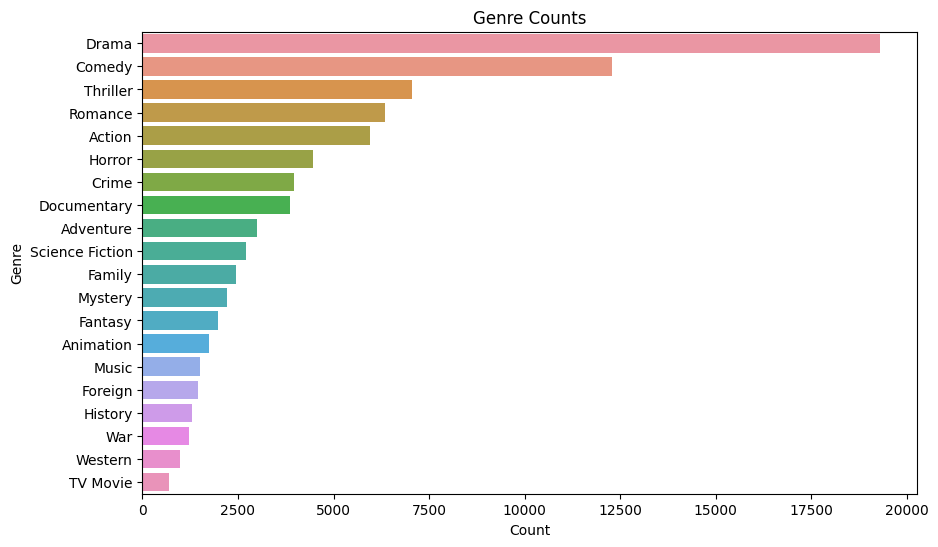

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
genre_counts=rawinput['genres_list'].str.split(',').explode().value_counts().to_dict()
df_genre_counts = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count'])
df_genre_counts = df_genre_counts.reset_index().rename(columns={'index': 'Genre'})

# Plot the genre counts using sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_genre_counts, x='Count', y='Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Genre Counts')
plt.show()

In [ ]:
df_genre_counts.assign(proportion_pct=100*df_genre_counts['Count'] / df_genre_counts['Count'].sum())

,Genre,Count,proportion_pct
0,Drama,19307,22.869089
1,Comedy,12273,14.537335
2,Thriller,7059,8.361366
3,Romance,6357,7.529849
4,Action,5941,7.037098
5,Horror,4467,5.291149
6,Crime,3953,4.682318
7,Documentary,3861,4.573344
8,Adventure,3001,3.554676
9,Science Fiction,2697,3.194589


In [ ]:
rawinput['genres_list']=rawinput['genres_list'].str.split(',')

<ipython-input-30-d9a2545c8695>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawinput['genres_list']=rawinput['genres_list'].str.split(',')


In [ ]:
rawinput

,genres,overview,genres_list
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,"[Adventure, Family, Fantasy]"
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,"[Comedy, Romance]"
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]"
4,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,[Comedy]
...,...,...,...
45459,"[{'id': 878, 'name': 'Science Fiction'}]",It's the year 3000 AD. The world's most danger...,[Science Fiction]
45460,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","Yet another version of the classic epic, with ...","[Action, Drama, Romance]"
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Rising and falling between a man and woman.,"[Drama, Family]"
45462,"[{'id': 18, 'name': 'Drama'}]",An artist struggles to finish his work while a...,[Drama]


In [ ]:
new_df = pd.DataFrame([],columns=['genre','overview'])

In [ ]:
#Reformat the dataframe to triples of title, overview and genre
Idx=rawinput.set_index(['overview']).genres.apply(pd.Series).stack().index


In [ ]:
new_df = pd.DataFrame(rawinput.set_index(['overview']).genres.apply(pd.Series).stack().values.tolist(),index=Idx).reset_index().drop('level_1',1)

<ipython-input-34-9f098b17a99b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_df = pd.DataFrame(rawinput.set_index(['overview']).genres.apply(pd.Series).stack().values.tolist(),index=Idx).reset_index().drop('level_1',1)


In [ ]:
new_df.columns = ['overview','id','genre']

In [ ]:
new_df

,overview,id,genre
0,"Led by Woody, Andy's toys live happily in his ...",16,Animation
1,"Led by Woody, Andy's toys live happily in his ...",35,Comedy
2,"Led by Woody, Andy's toys live happily in his ...",10751,Family
3,When siblings Judy and Peter discover an encha...,12,Adventure
4,When siblings Judy and Peter discover an encha...,14,Fantasy
...,...,...,...
84419,Rising and falling between a man and woman.,10751,Family
84420,An artist struggles to finish his work while a...,18,Drama
84421,"When one of her hits goes wrong, a professiona...",28,Action
84422,"When one of her hits goes wrong, a professiona...",18,Drama


In [ ]:
print('Maximium number of words in any description: ', new_df.overview.str.split().str.len().max())
print('Minimum number of words in any description: ', new_df.overview.str.split().str.len().min())
print('Average description length: ', new_df.overview.str.split().str.len().mean())
print('Median description length: ', new_df.overview.str.split().str.len().median())
print('Stdev description length: ', new_df.overview.str.split().str.len().std())
print('Average number of genres per movie', new_df['overview'].value_counts().mean())

Maximium number of words in any description:  187
Minimum number of words in any description:  4
Average description length:  55.40538235572823
Median description length:  49.0
Stdev description length:  34.087424417175846
Average number of genres per movie 2.055412182889419


In [ ]:
# The problem is a multi-label classification task.
# Each input vector containing description is mapped to 1 or more genres
# Therefore, the target vector of each entry is a binary vector representing the presence of genres, that is filled
# with 1's if the entry contains the genre and 0 if it does not.

# For example: The movie 'Othello' will have one 1 present at first position (Drama) and every other position will
# be fileld with zeros.

In [ ]:
# Use the group-by function of pandas to create the binary vectors of genre presence.
grouped = new_df.groupby(['overview','genre']).size().unstack().fillna(0).reset_index()

In [ ]:
grouped.head(3)

genre,overview,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,"""21-87 is a 1963 Canadian abstract film create...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"""88 Minutes"" focuses on a college professor (P...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,"""A Christmas Melody"" revolves around Kristin, ...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
!pip install transformers
!pip install torch
!pip install tensorflow
!pip install torch
!pip install keras
!pip install Keras-Preprocessing
!pip install scikit-learn
import tensorflow as tf
import torch
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score
import pickle
import transformers
from tqdm import tqdm, trange
from ast import literal_eval
!pip install sentencepiece
from transformers import AdamW

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.9 MB/s eta 0:00:00


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
# Split the dataframe into train and test (80-20), keep the Test split for later.
# K fold cross validation could be used too but that would take K-times the training time. (Too much now)

msk = np.random.rand(len(grouped)) < 0.8
train = grouped[msk]
test = grouped[~msk]

In [ ]:
cols = train.columns # Get names of all columns
label_cols = list(cols[1:]) # Get column names
num_labels = len(label_cols) # Get number of unique genres types used in classification.
train = train.sample(frac=1).reset_index(drop=True)

In [ ]:
train['one_hot_labels'] = list(train[label_cols].values) #Create one hot vectors for all rows

In [ ]:
labels = list(train.one_hot_labels.values) #Get the binary one hot vectors from dataframe.
comments = list(train.overview.values) # Get text data from dataframe.

In [ ]:
### Notice how the standard preprocessing is not performed. (Stop word removal, lemmatisation, special character striping)
### This way the Transformer model learns the whole context of all sentences rather than compressed information.

from transformers import BertTokenizer
max_length = 100
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True) # Use the tokenizer from huggingface library.

# Encode the descriptions to a 100 long vector and pad with 0 if needed.
encodings = tokenizer.batch_encode_plus(comments,max_length=max_length,pad_to_max_length=True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
input_ids = encodings['input_ids'] # Get tokenized and encoded text.
token_type_ids = encodings['token_type_ids'] # Get token type ids.
attention_masks = encodings['attention_mask'] # Get the attention masks.

In [ ]:
label_counts = train.one_hot_labels.astype(str).value_counts()
one_freq = label_counts[label_counts==1].keys()
one_freq_idxs = sorted(list(train[train.one_hot_labels.astype(str).isin(one_freq)].index), reverse=True)

In [ ]:
# Gathering single instance inputs to force into the training set after stratified split
one_freq_input_ids = [input_ids.pop(i) for i in one_freq_idxs]
one_freq_token_types = [token_type_ids.pop(i) for i in one_freq_idxs]
one_freq_attention_masks = [attention_masks.pop(i) for i in one_freq_idxs]
one_freq_labels = [labels.pop(i) for i in one_freq_idxs]

In [ ]:
#comments
#labels
#token_type_ids
#attention_masks

In [ ]:
label_counts# Create train and validation splits. 75 % Train, 20% Test, 5% Validation.
train_inputs, validation_inputs, train_labels, validation_labels, train_token_types, validation_token_types, train_masks, validation_masks = train_test_split(input_ids, labels, token_type_ids,attention_masks,
                                                            random_state=2020, test_size=0.05, stratify = labels)

# Convert everything to tensors.
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
train_token_types = torch.tensor(train_token_types)

val_inputs = torch.tensor(validation_inputs)
val_labels = torch.tensor(validation_labels)
val_masks = torch.tensor(validation_masks)
val_token_types = torch.tensor(validation_token_types)

In [ ]:
# Create dataloaders
train_data = TensorDataset(train_inputs, train_masks, train_labels, train_token_types)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

val_data = TensorDataset(val_inputs, val_masks, val_labels, val_token_types)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=32)

In [ ]:
train_labels

tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [ ]:
# Load models and put them to GPU
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=20)
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Tweak some parameters for the optimiser, add weight decay which should increase accuracy.
param_optimizer = list(model.named_parameters())
# Exclude the bias, gamma and beta parameters from weight decay.
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [ ]:
# Build the optimiser with tweaked parameters.
optimizer = AdamW(optimizer_grouped_parameters,lr=2e-5,correct_bias=True)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import torch

torch.cuda.is_available()

True

In [ ]:
train_loss_set = []

# Transformers typically are trained on small numbers of epochs. n<5, which is recommended by the authors.
# Training on a Google Colab should take around 40 minutes for 4 epochs.

# Due to the highly imbalanced nature of the dataset, we look at F1 score rather than plain
# Accuracy. F1 score is a harmonic mean of precision and recall,
# and informs how the model performs with false positives and false negatives.
# The FP and FN are expressed by Precision and Recall.

epochs = 1

for e in range(epochs):

    print("epoch no", e)
    model.train()

    tr_loss = 0  # running loss
    nb_tr_examples, nb_tr_steps = 0, 0

    # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):

        if step % 30 == 0:
            print("Batch No", step, "Out of ", len(train_dataloader))

        batch = tuple(t.to(device) for t in batch)

        # Extract the required variables for loss calculation from the batch.
        b_input_ids, b_input_mask, b_labels, b_token_types = batch

        # Set the gradients of the optimiser to zero.
        optimizer.zero_grad()

        # Perform one forward pass through entire transformer.
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        # Extract logits from the ouputs variable.
        logits = outputs[0]
        # Initialise loss function. Binary Cross Entropy.
        loss_func = BCEWithLogitsLoss()

        # Calculate loss, As the difference between Predicted labels and True labels of all binary vectors.
        loss = loss_func(
            logits.view(-1, num_labels), b_labels.type_as(logits).view(-1, num_labels)
        )
        train_loss_set.append(loss.item())

        # Perform one backward pass (Backpropagation) and calculate new gradients.
        loss.backward()
        # Perform one step of the Adam optimiser with newly calculated gradients.
        optimizer.step()
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    print("Train loss: {}".format(tr_loss / nb_tr_steps))

    # Perform validation epoch. Set the model to Evaluation mode.
    # Which means no gradients are calculated
    model.eval()

    # Variables to gather full output
    logit_preds, true_labels, pred_labels = [], [], []

    # Predict on all batches of validation dataloader.
    for i, batch in enumerate(val_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels, b_token_types = batch
        # Freeze gradients in the variables.
        with torch.no_grad():
            outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            b_logit_pred = outs[0]
            pred_label = torch.sigmoid(b_logit_pred)

            b_logit_pred = b_logit_pred.detach().cpu().numpy()
            pred_label = pred_label.to("cpu").numpy()
            b_labels = b_labels.to("cpu").numpy()

        logit_preds.append(b_logit_pred)
        true_labels.append(b_labels)
        pred_labels.append(pred_label)

    pred_labels = [item for sublist in pred_labels for item in sublist]
    true_labels = [item for sublist in true_labels for item in sublist]

    # Calculate F1 score.
    threshold = 0.50
    pred_bools = [pl > threshold for pl in pred_labels]
    true_bools = [tl == 1 for tl in true_labels]
    val_f1_accuracy = f1_score(true_bools, pred_bools, average="micro") * 100

    print("F1 Validation metric: ", val_f1_accuracy)


epoch no 0
Batch No 0 Out of  960
Batch No 30 Out of  960
Batch No 60 Out of  960
Batch No 90 Out of  960
Batch No 120 Out of  960
Batch No 150 Out of  960
Batch No 180 Out of  960
Batch No 210 Out of  960
Batch No 240 Out of  960
Batch No 270 Out of  960
Batch No 300 Out of  960
Batch No 330 Out of  960
Batch No 360 Out of  960
Batch No 390 Out of  960
Batch No 420 Out of  960
Batch No 450 Out of  960
Batch No 480 Out of  960
Batch No 510 Out of  960
Batch No 540 Out of  960
Batch No 570 Out of  960
Batch No 600 Out of  960
Batch No 630 Out of  960
Batch No 660 Out of  960
Batch No 690 Out of  960
Batch No 720 Out of  960
Batch No 750 Out of  960
Batch No 780 Out of  960
Batch No 810 Out of  960
Batch No 840 Out of  960
Batch No 870 Out of  960
Batch No 900 Out of  960
Batch No 930 Out of  960
Train loss: 0.21341944513842465
F1 Validation metric:  59.41845764854614


In [ ]:
list(test.columns[1:])

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [ ]:
#Prepare Test Data

test_label_cols = list(test.columns[1:])
test['one_hot_labels'] = list(test[test_label_cols].values)

# Gathering input data
test_labels = list(test.one_hot_labels.values)
test_comments = list(test.overview.values)

# Encode and Extract
test_encodings = tokenizer.batch_encode_plus(test_comments,max_length=max_length,pad_to_max_length=True)
test_input_ids = test_encodings['input_ids']
test_token_type_ids = test_encodings['token_type_ids']
test_attention_masks = test_encodings['attention_mask']

# Tensorify variables
test_inputs = torch.tensor(test_input_ids)
test_labels = torch.tensor(test_labels)
test_masks = torch.tensor(test_attention_masks)
test_token_types = torch.tensor(test_token_type_ids)

# Create test dataloader
test_data = TensorDataset(test_inputs, test_masks, test_labels, test_token_types)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=32)

<ipython-input-96-cd9df82b269b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['one_hot_labels'] = list(test[test_label_cols].values)
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Perform testing of the model on Testing split.

model.eval()

# track variables
logit_preds, true_labels, pred_labels = [], [], []

# Predict
for i, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels, b_token_types = batch
    with torch.no_grad():
        # Forward pass
        outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        b_logit_pred = outs[0]
        pred_label = torch.sigmoid(b_logit_pred)

        # Take the logits to cpu from GPU.
        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to("cpu").numpy()
        b_labels = b_labels.to("cpu").numpy()

    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

pred_labels = [item for sublist in pred_labels for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]

# Converting flattened binary values to boolean values
true_bools = [tl == 1 for tl in true_labels]


In [ ]:
# Now filter the predictions from the sigmoid function. If a prediction value for a genre is higher than 0.5
# Count this instance as predicted Genre.
# Eg. if Movie has Output of 0.6 for Drama column. This means Drama is predicted genre for this movie.

pred_bools = [pl>0.50 for pl in pred_labels]
print('Test F1 Score: ', f1_score(true_bools, pred_bools,average='micro'))
clf_report = classification_report(true_bools,pred_bools, target_names=label_cols, output_dict=True)



Test F1 Score:  0.5744116209232488


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf_report


{'Action': {'precision': 0.6769041769041769,
  'recall': 0.4429260450160772,
  'f1-score': 0.5354713313896988,
  'support': 1244},
 'Adventure': {'precision': 0.5892857142857143,
  'recall': 0.16638655462184873,
  'f1-score': 0.2595019659239843,
  'support': 595},
 'Animation': {'precision': 0.5353535353535354,
  'recall': 0.30547550432276654,
  'f1-score': 0.3889908256880734,
  'support': 347},
 'Comedy': {'precision': 0.7358813462635482,
  'recall': 0.532617671345995,
  'f1-score': 0.6179640718562874,
  'support': 2422},
 'Crime': {'precision': 0.649867374005305,
  'recall': 0.29589371980676327,
  'f1-score': 0.40663900414937754,
  'support': 828},
 'Documentary': {'precision': 0.8155197657393851,
  'recall': 0.7547425474254743,
  'f1-score': 0.7839549612948629,
  'support': 738},
 'Drama': {'precision': 0.7662835249042146,
  'recall': 0.7108403148007109,
  'f1-score': 0.7375214012906625,
  'support': 3939},
 'Family': {'precision': 0.65625,
  'recall': 0.4251012145748988,
  'f1-scor

In [ ]:
pd.DataFrame(clf_report).T

,precision,recall,f1-score,support
Action,0.676904,0.442926,0.535471,1244.0
Adventure,0.589286,0.166387,0.259502,595.0
Animation,0.535354,0.305476,0.388991,347.0
Comedy,0.735881,0.532618,0.617964,2422.0
Crime,0.649867,0.295894,0.406639,828.0
Documentary,0.815520,0.754743,0.783955,738.0
Drama,0.766284,0.710840,0.737521,3939.0
Family,0.656250,0.425101,0.515971,494.0
Fantasy,0.833333,0.049628,0.093677,403.0
Foreign,0.000000,0.000000,0.000000,296.0


In [ ]:
# The test F1 Accuracy of 0.60 is quite remarkable as the Training Dataset had around 31.000 samples and 20 classes with
# high degree of imbalance.
# For an increased F1 metric either the classess could be rebalanced or the number of classes should be reduced
# And K-fold cross validation could be used too.

# The model totally fails to perform on classess ['Foreign, TV Movie'], and performs badly on Mystery, History and Fantasy.
# The model does not necesarrily perform badly on genres with low representation, as
# genres Documentary, Western or Horror scored a high F1 score.

frame = pd.DataFrame(clf_report).T
frame = frame.iloc[:-4, :]
frame = frame.sort_values(by='f1-score',ascending=False)
frame = frame.reset_index()
frame.columns = ['genre','precision','recall','f1-score','support']
frame

,genre,precision,recall,f1-score,support
0,Documentary,0.815520,0.754743,0.783955,738.0
1,Western,0.817610,0.695187,0.751445,187.0
2,Drama,0.766284,0.710840,0.737521,3939.0
3,Horror,0.734513,0.635667,0.681525,914.0
4,Science Fiction,0.805158,0.522305,0.633596,538.0
5,Comedy,0.735881,0.532618,0.617964,2422.0
6,War,0.720930,0.486275,0.580796,255.0
7,Thriller,0.538870,0.565551,0.551888,1434.0
8,Action,0.676904,0.442926,0.535471,1244.0
9,Family,0.656250,0.425101,0.515971,494.0


In [ ]:
### Save the model. Should take around 400MB.
torch.save(model.state_dict(), 'model-new.pt')

In [ ]:
from transformers import BertForSequenceClassification

In [ ]:
# Load the model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=20)
model.load_state_dict(torch.load('model-new.pt'))
model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
sample = test.sample(n=20) # Sample 10 entries from a test split, which was not used on training the model.
sample.head(5)

genre,overview,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,one_hot_labels
19214,Genetically mutated bats escape and it's up to...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
17318,"Eric O'Neill, a computer specialist who wants ...",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ..."
3422,A girl and her brother fly to New Guinea to lo...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8217,A young American serviceman stationed in Germa...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
18300,Follows the inner transformation of a man who ...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ..."


In [ ]:
model = model.to(device)

In [108]:
for i, desc in enumerate(sample['overview']):

    encoded = tokenizer.encode_plus(desc, max_length=100, pad_to_max_length=True)
    # Extract encoded input.
    seed_ids = encoded["input_ids"]
    seed_token_type_ids = encoded["token_type_ids"]
    seed_masks = encoded["attention_mask"]
    inp = torch.tensor(seed_ids)
    msk = torch.tensor(seed_masks)
    tok = torch.tensor(seed_token_type_ids)
    inp = inp.unsqueeze(0)  # Reshape the tensor into [1,100]
    msk = msk.unsqueeze(0)  # Reshape the tensor into [1,100]
    inp = inp.to(device)
    msk = msk.to(device)
    ot = model(inp, token_type_ids=None, attention_mask=msk)
    # Extract logits from output.
    b_logit_pred = ot[0]
    # Put the logits through sigmoid and get predictions for each genre.
    pred_label = torch.sigmoid(b_logit_pred)
    pred_bools = [pl > 0.50 for pl in pred_label]
    ar = pred_bools[0].cpu().detach().numpy()

    # Match the predicted labels with actual labels to get genre names.
    t = np.where(ar)[0]
    label_cols = np.array(label_cols)
    t = np.array(t)

    # Extract true genre names for a movie.
    true = np.where(sample["one_hot_labels"].iloc[i])[0]

    print("\n")
    print(i)
    #print("Title:", title)
    print("Description:", desc)
    print("Predicted Genres", label_cols[t])
    print("Actual Genres", label_cols[true])
    # print({"title": title, "description": desc,"genre":label_cols[t]})




0
Description: Genetically mutated bats escape and it's up to a bat expert and the local sheriff to stop them.
Predicted Genres []
Actual Genres ['Horror' 'Thriller']


1
Description: Eric O'Neill, a computer specialist who wants to be made an agent is assigned to clerk for Robert Hanssen, a senior agent with 25 years in the FBI, and to write down everything Hanssen does. O'Neill's told it's an investigation of Hanssen's sexual habits, however Hanssen is really suspected of spying for the Soviet Union and Russia for years and being responsible for the deaths of agents working for the United States.
Predicted Genres ['Drama' 'Thriller']
Actual Genres ['Crime' 'Drama' 'History' 'Thriller']


2
Description: A girl and her brother fly to New Guinea to look for a lost expedition, led by her husband, which has vanished in the great jungle.
Predicted Genres ['Adventure' 'Drama']
Actual Genres ['Adventure' 'Horror']


3
Description: A young American serviceman stationed in Germany after the 